# Exercise 1.1

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


# Exercise 1.2

In [7]:
from datetime import datetime as dt

mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [8]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [9]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [10]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [11]:
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == dt(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


In [12]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

In [13]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


In [15]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

# Exercise 1.3

n is every 4 hours.

In [16]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [17]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [18]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [19]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [20]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [21]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [23]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == dt(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00


In [24]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
             01-00-04  57 ST-7 AV         17
             01-00-05  57 ST-7 AV         20
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    20
A049   R088  02-05-00  CORTLANDT ST       15
A066   R118  00-00-00  CANAL ST           20
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J034   R007  00-00-02  104 ST             20
JFK01  R535  00-00-01  HOWARD BCH JFK      1
             00-00-02  HOWARD BCH JFK      1
             00-00-03  HOWARD BCH JFK      2
JFK02  R535  01-00-01  HOWARD BCH JFK      1
             01-00-02  HOWARD BCH JFK      1
             01-00-03  HOWARD BCH JFK      1
             01-00-04  HOWARD BCH JFK      1
             01-00-05  HOWARD BCH JFK      1
             01-00-06  HOWARD BCH JFK      1
JFK03  R536  00-00-01  JFK JAMAICA CT1     2
             00-

In [25]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

(194, 1894869683.0)
(262183, 67111299.0)
(63, 1054429.0)
(2862, 2044694.0)
(1912607049, 7509132.0)
(285, 1494569141.0)
(2542, 14129479.0)
(67108864, 0.0)
(335600216, 1374824.0)
(36, 3252790.0)
(1117, 3665497.0)
(262269, 10823938.0)
(1452, 1460387.0)
(1154413610, 8957775.0)
(100665773, 35655801.0)
(1443, 1014193.0)
(186916568, 604712476.0)
(874, 6130902.0)
(598, 11078528.0)
(1160, 74672293.0)
(0, 117440532.0)
(100663296, 1299.0)
(117440514, 100663296.0)
(2123, 9170483.0)
(428, 2336204.0)
(1024, 12498870.0)


In [26]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

(194, 1894869683.0)
(262183, 67111299.0)
(63, 1054429.0)
(2862, 2044694.0)
(1912607049, 7509132.0)
(285, 1494569141.0)
(2542, 14129479.0)
(67108864, 0.0)
(335600216, 1374824.0)
(36, 3252790.0)
(1117, 3665497.0)
(262269, 10823938.0)
(1452, 1460387.0)
(1154413610, 8957775.0)
(100665773, 35655801.0)
(1443, 1014193.0)
(186916568, 604712476.0)
(874, 6130902.0)
(598, 11078528.0)
(1160, 74672293.0)
(0, 117440532.0)
(100663296, 1299.0)
(117440514, 100663296.0)
(2123, 9170483.0)
(428, 2336204.0)
(1024, 12498870.0)


In [28]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


# Exercise 1.4

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
oneturn = turnstiles_daily[(turnstiles_daily.STATION == '59 ST') & (turnstiles_daily.SCP == '02-00-00')]
oneturn

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0
6,A002,R051,02-00-00,59 ST,09/02/2016,5808616,09/01/2016,5806990.0,1626.0
7,A002,R051,02-00-00,59 ST,09/03/2016,5809522,09/02/2016,5808616.0,906.0
8,A002,R051,02-00-00,59 ST,09/04/2016,5810188,09/03/2016,5809522.0,666.0
9,A002,R051,02-00-00,59 ST,09/05/2016,5810871,09/04/2016,5810188.0,683.0
10,A002,R051,02-00-00,59 ST,09/06/2016,5812270,09/05/2016,5810871.0,1399.0


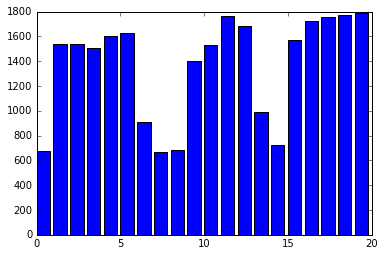

In [33]:
plt.bar(range(len(oneturn.DATE)),oneturn.DAILY_ENTRIES);

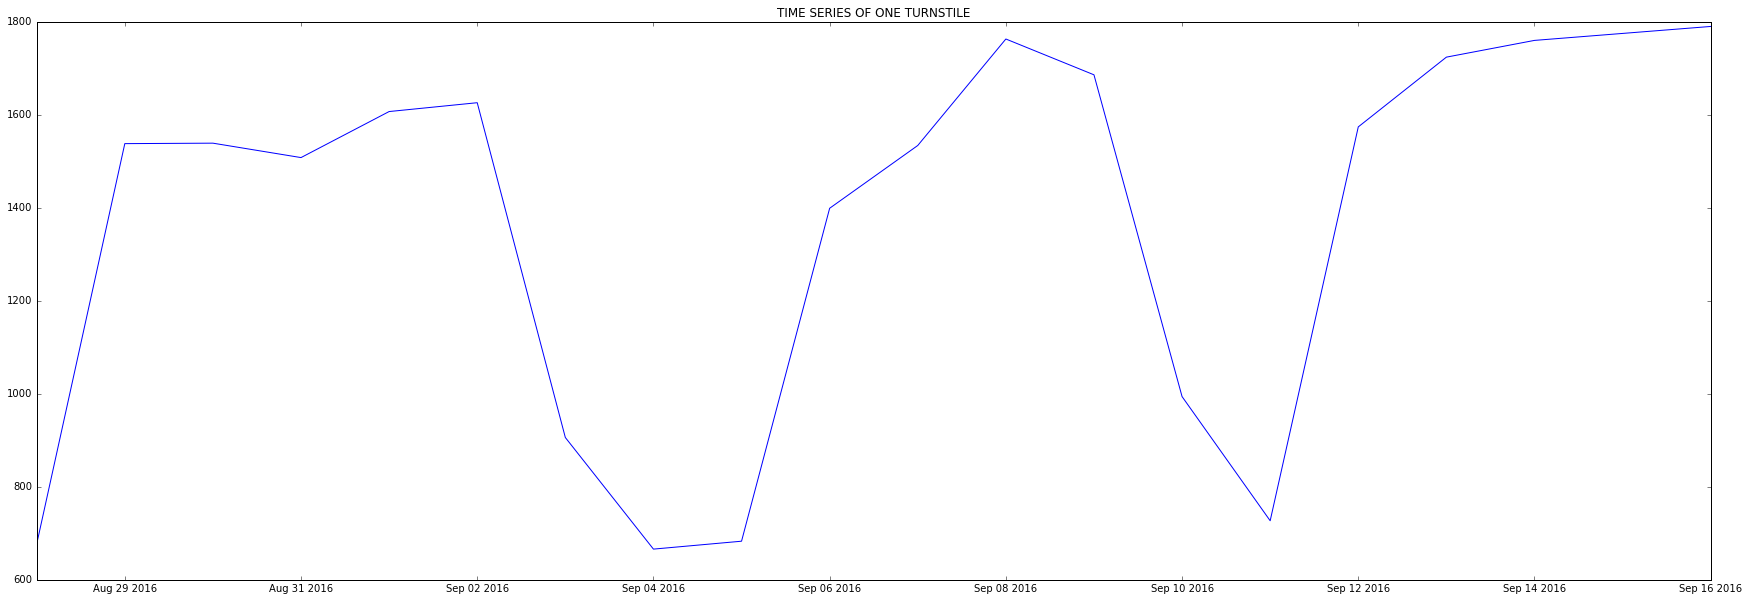

In [36]:
dates = pd.date_range('20160828', periods=20, freq='1D')
plt.figure(figsize = (30, 10))
counts = oneturn['DAILY_ENTRIES']
plt.title("TIME SERIES OF ONE TURNSTILE")
plt.plot(dates,counts)

# Exercise 1.5

In [37]:
turnstiles_daily.groupby(['C/A','UNIT','STATION','DATE']).sum()

ENTRIES  PREV_ENTRIES  DAILY_ENTRIES
C/A   UNIT STATION       DATE                                             
A002  R051 59 ST         08/28/2016  56528031    56520135.0         7896.0
                         08/29/2016  56543493    56528031.0        15462.0
                         08/30/2016  56560115    56543493.0        16622.0
                         08/31/2016  56576672    56560115.0        16557.0
                         09/01/2016  56593136    56576672.0        16464.0
                         09/02/2016  56609055    56593136.0        15919.0
                         09/03/2016  56618391    56609055.0         9336.0
                         09/04/2016  56625694    56618391.0         7303.0
                         09/05/2016  56632799    56625694.0         7105.0
                         09/06/2016  56648493    56632799.0        15694.0
                         09/07/2016  56665918    56648493.0        17425.0
                         09/08/2016  56683981    56665918.0        18063.0
                         09/09/2016  56701807    56683981.0        17826.0
                         09/10/2016  56712496    56701807.0        10689.0
                         09/11/2016  56720835    56712496.0         8339.0
                         09/12/2016  56736936    56720835.0        16101.0
                         09/13/2016  56755011    56736936.0        18075.0
                         09/14/2016  56773224    56755011.0        18213.0
                         09/15/2016  56791643    56773224.0        18419.0
                         09/16/2016  56809958    56791643.0        18315.0
A006  R079 5 AV/59 ST    08/28/2016  46179678    46173299.0         6379.0
                         08/29/2016  46191821    46179678.0        12143.0
                         08/30/2016  46204983    46191821.0        13162.0
                         08/31/2016  46218188    46204983.0        13205.0
                         09/01/2016  46230727    46218188.0        12539.0
                         09/02/2016  46242707    46230727.0        11980.0
                         09/03/2016  46250557    46242707.0         7850.0
                         09/04/2016  46257159    46250557.0         6602.0
                         09/05/2016  46263230    46257159.0         6071.0
                         09/06/2016  46276050    46263230.0        12820.0
...                                       ...           ...            ...
TRAM1 R468 RIT-MANHATTAN 09/07/2016   3385729     3381692.0         4037.0
                         09/08/2016   3389637     3385729.0         3908.0
                         09/09/2016   3393707     3389637.0         4070.0
                         09/10/2016   3397734     3393707.0         4027.0
                         09/11/2016   3401756     3397734.0         4022.0
                         09/12/2016   3405715     3401756.0         3959.0
                         09/13/2016   3409987     3405715.0         4272.0
                         09/14/2016   3413953     3409987.0         3966.0
                         09/15/2016   3418235     3413953.0         4282.0
                         09/16/2016   3422703     3418235.0         4468.0
TRAM2 R469 RIT-ROOSEVELT 08/28/2016   8140519     8136324.0         4195.0
                         08/29/2016   8144360     8140519.0         3841.0
                         08/30/2016   8148234     8144360.0         3874.0
                         08/31/2016   8151992     8148234.0         3758.0
                         09/01/2016   8155400     8151992.0         3408.0
                         09/02/2016   8159504     8155400.0         4104.0
                         09/03/2016   8163381     8159504.0         3877.0
                         09/04/2016   8167546     8163381.0         4165.0
                         09/05/2016   8171923     8167546.0         4377.0
                         09/06/2016   8175480     8171923.0         3557.0
                         09/07/2016   8179515     8175480.0    

# Exercise 1.6

In [1]:
station_daily = turnstiles_daily.groupby(['STATION','DATE']).sum().reset_index()
station_daily.head()

NameError: name 'turnstiles_daily' is not defined

In [44]:
stationdict = {}
for key in station_daily.STATION.unique():
    stationdict[key] = list(station_daily.DAILY_ENTRIES[station_daily.STATION == key])
stationdict

{'1 AV': [13871.0,
  18064.0,
  19182.0,
  19616.0,
  20170.0,
  20439.0,
  15187.0,
  12951.0,
  11376.0,
  19007.0,
  20756.0,
  23347.0,
  24124.0,
  19432.0,
  15778.0,
  19249.0,
  22949.0,
  23671.0,
  24269.0,
  24650.0],
 '103 ST': [11981.0,
  27617.0,
  29685.0,
  30240.0,
  29911.0,
  29622.0,
  19287.0,
  16457.0,
  16794.0,
  30694.0,
  30294.0,
  34782.0,
  34130.0,
  15428.0,
  12265.0,
  30459.0,
  34859.0,
  35493.0,
  35660.0,
  35151.0],
 '103 ST-CORONA': [12406.0,
  19323.0,
  19806.0,
  19931.0,
  19513.0,
  19838.0,
  14867.0,
  11921.0,
  11663.0,
  19578.0,
  20720.0,
  21342.0,
  21353.0,
  15424.0,
  12358.0,
  19939.0,
  21658.0,
  21413.0,
  21733.0,
  21793.0],
 '104 ST': [2020.0,
  4433.0,
  4599.0,
  4569.0,
  4610.0,
  4344.0,
  2485.0,
  1957.0,
  2122.0,
  4651.0,
  4944.0,
  5183.0,
  5113.0,
  2709.0,
  1969.0,
  4722.0,
  5173.0,
  5126.0,
  5269.0,
  5107.0],
 '110 ST': [6639.0,
  10514.0,
  10834.0,
  11188.0,
  11008.0,
  10930.0,
  7582.0,
  6257

# Exercise 1.7

In [49]:
onestat = station_daily[(station_daily.STATION == '1 AV')]
onestat

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,08/28/2016,1412279669,1.412266e+09,13871.0
1,1 AV,08/29/2016,1412297733,1.412280e+09,18064.0
2,1 AV,08/30/2016,1412316915,1.412298e+09,19182.0
3,1 AV,08/31/2016,1412336531,1.412317e+09,19616.0
4,1 AV,09/01/2016,1412356701,1.412337e+09,20170.0
5,1 AV,09/02/2016,1412377140,1.412357e+09,20439.0
6,1 AV,09/03/2016,1412392327,1.412377e+09,15187.0
7,1 AV,09/04/2016,1412405278,1.412392e+09,12951.0
8,1 AV,09/05/2016,1412416654,1.412405e+09,11376.0
9,1 AV,09/06/2016,1412435661,1.412417e+09,19007.0


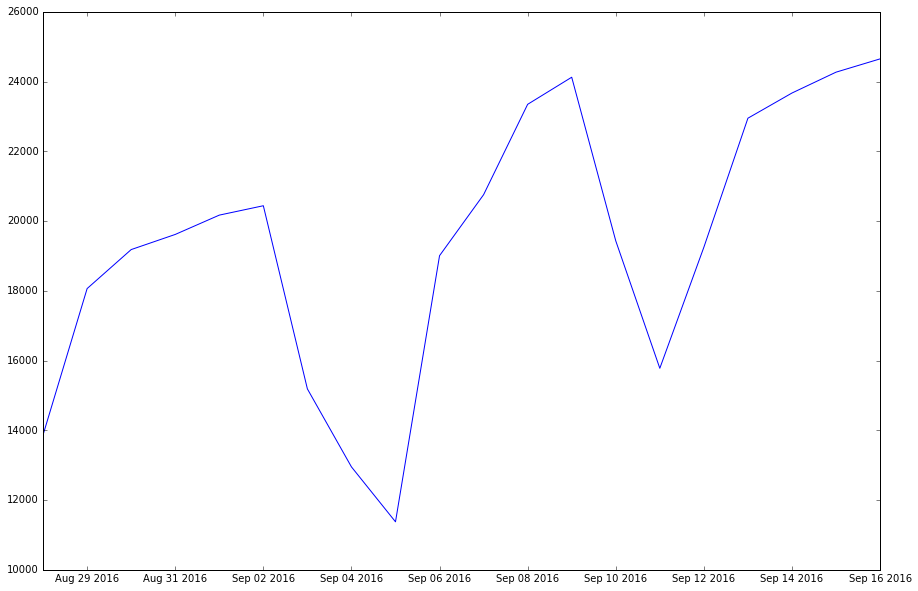

In [52]:
plt.figure(figsize = (15,10))
dates = pd.date_range('20160828', periods=20, freq='1D')
dates
count = onestat.DAILY_ENTRIES
plt.plot(dates, count)

# Exercise 1.8

In [55]:
dayseries = ['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY']

In [56]:
dayseries

['SUNDAY',
 'MONDAY',
 'TUESDAY',
 'WEDNESDAY',
 'THURSDAY',
 'FRIDAY',
 'SATURDAY',
 'SUNDAY',
 'MONDAY',
 'TUESDAY',
 'WEDNESDAY',
 'THURSDAY',
 'FRIDAY',
 'SATURDAY',
 'SUNDAY',
 'MONDAY',
 'TUESDAY',
 'WEDNESDAY',
 'THURSDAY',
 'FRIDAY']

In [60]:
onestat['DAY_OF_WEEK'] = dayseries
onestat

/Users/Sam/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES,DAY_OF_WEEK
0,1 AV,08/28/2016,1412279669,1.412266e+09,13871.0,SUNDAY
1,1 AV,08/29/2016,1412297733,1.412280e+09,18064.0,MONDAY
2,1 AV,08/30/2016,1412316915,1.412298e+09,19182.0,TUESDAY
3,1 AV,08/31/2016,1412336531,1.412317e+09,19616.0,WEDNESDAY
4,1 AV,09/01/2016,1412356701,1.412337e+09,20170.0,THURSDAY
5,1 AV,09/02/2016,1412377140,1.412357e+09,20439.0,FRIDAY
6,1 AV,09/03/2016,1412392327,1.412377e+09,15187.0,SATURDAY
7,1 AV,09/04/2016,1412405278,1.412392e+09,12951.0,SUNDAY
8,1 AV,09/05/2016,1412416654,1.412405e+09,11376.0,MONDAY
9,1 AV,09/06/2016,1412435661,1.412417e+09,19007.0,TUESDAY


In [65]:
dayofweek = onestat.groupby(['DAY_OF_WEEK']).sum().reset_index()
dayofweek

,DAY_OF_WEEK,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,FRIDAY,4237534914,4.237466e+09,69213.0
1,MONDAY,4237272734,4.237224e+09,48689.0
2,SATURDAY,2824915647,2.824881e+09,34619.0
3,SUNDAY,4237224045,4.237181e+09,42600.0
4,THURSDAY,4237465701,4.237398e+09,67786.0
5,TUESDAY,4237333872,4.237273e+09,61138.0
6,WEDNESDAY,4237397915,4.237334e+09,64043.0


In [73]:
dayweeksort = dayofweek.reindex([3,1,5,6,4,0,2])

In [91]:
dayweeksort

,DAY_OF_WEEK,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
3,SUNDAY,4237224045,4.237181e+09,42600.0
1,MONDAY,4237272734,4.237224e+09,48689.0
5,TUESDAY,4237333872,4.237273e+09,61138.0
6,WEDNESDAY,4237397915,4.237334e+09,64043.0
4,THURSDAY,4237465701,4.237398e+09,67786.0
0,FRIDAY,4237534914,4.237466e+09,69213.0
2,SATURDAY,2824915647,2.824881e+09,34619.0


<Container object of 7 artists>

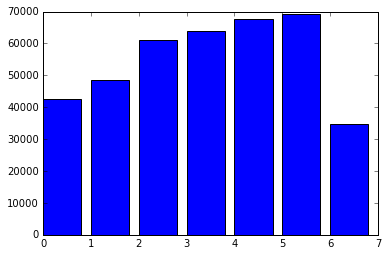

In [97]:
plt.bar(range(len(dayweeksort.DAY_OF_WEEK)),dayweeksort.DAILY_ENTRIES)

# Exercise 1.9

In [108]:
stationtot = station_daily.groupby(['STATION']).sum().reset_index()
stationtot.head()

,STATION,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,28249144828,2.824876e+10,388088.0
1,103 ST,3130518105,3.129977e+09,540809.0
2,103 ST-CORONA,1309975158,1.309609e+09,366579.0
3,104 ST,99621212569,9.962115e+10,81105.0
4,110 ST,561468736,5.612593e+08,209425.0


In [109]:
stationtot.sort_values(['DAILY_ENTRIES']).reset_index()

,index,STATION,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,330,SARATOGA AV,505569741,5.055697e+08,25.0
1,306,ORCHARD BEACH,8483172,8.482152e+06,1020.0
2,315,PENNSYLVANIA AV,260590377,2.730882e+08,1025.0
3,159,BROAD CHANNEL,36463909,3.645831e+07,5597.0
4,138,BEACH 105 ST,2372699166,2.372693e+09,6556.0
5,141,BEACH 44 ST,51604972,5.159239e+07,12581.0
6,297,NEWARK HM HE,15232095,1.521892e+07,13179.0
7,145,BEACH 98 ST,89784090,8.977040e+07,13689.0
8,349,TOMPKINSVILLE,180787669,1.807739e+08,13730.0
9,328,ROCKAWAY PARK B,2105312789,2.105296e+09,16822.0


# Exercise 1.10

In [114]:
total_ridership_counts = stationtot['DAILY_ENTRIES']

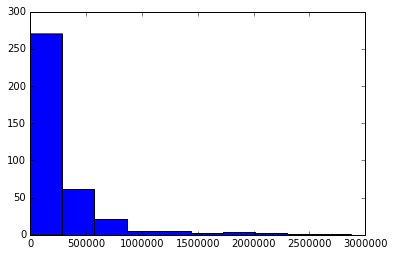

In [115]:
plt.hist(total_ridership_counts);